Import appropiate libaries/functions to look at the patient data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.fft import fft
from scipy.signal import butter,lfilter
import random
import scipy.signal as signal
import csv
import copy

import glob
# From another python file
from Filters import *
from Plotter import *
from Reader import *

Read the patient data using pandas and convert the data structure to numpy (Currently reads 4 patients 2 from non-af 2 from af)

In [2]:
# Non-af mimic 001
df_001_t = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_001_data.csv", usecols= [0])
df_001_d = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_001_data.csv", usecols= [1,2,3])

# Non-af mimic 003
df_003_t = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_003_data.csv",usecols= [0])
df_003_d = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_003_data.csv",usecols= [1,2,3])


# Convert non-af Pandas structure to numpy
n_001_t = df_001_t.to_numpy()
n_001_d = df_001_d.to_numpy()

n_003_t = df_003_t.to_numpy()
n_003_d = df_003_d.to_numpy()

#Af mimic 001
df_001af_t = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_af_csv/mimic_perform_af_csv/mimic_perform_af_001_data.csv",usecols=[0])
df_001af_d = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_af_csv/mimic_perform_af_csv/mimic_perform_af_001_data.csv",usecols=[1,2,3])

# AF mimic 016
df_016af_t = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_af_csv/mimic_perform_af_csv/mimic_perform_af_016_data.csv",usecols=[0])
df_016af_d = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_af_csv/mimic_perform_af_csv/mimic_perform_af_016_data.csv",usecols=[1,2,3])

# Convert non-af Pandas structure to numpy
n_001af_t = df_001af_t.to_numpy()
n_001af_d = df_001af_d.to_numpy()

n_016af_t = df_016af_t.to_numpy()
n_016af_d = df_016af_d.to_numpy()

path_af = "C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_af_csv/mimic_perform_af_csv"
path_nonaf = "C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv"
data_Main = Mimic_all_reader(path_nonaf)
data_mainaf = Mimic_all_reader(path_af)


Plot the PPG and ECG data of pateints without AF beside the filtered data

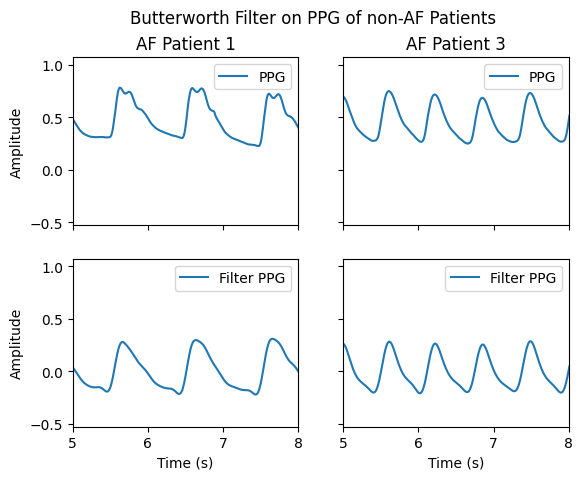

In [3]:

my_filter = Filters(Order=4 , Filter_type="bandpass")



yPPG1 = my_filter.butter_bandpass(n_001_d[:,0],0.5,5,125)
yECG1 = my_filter.butter_bandpass(n_001_d[:,1],0.05,62,125)
yPPG3 = my_filter.butter_bandpass(n_003_d[:,0],0.5,5,125)
yECG3 = my_filter.butter_bandpass(n_003_d[:,1],0.05,62,125)


sub_plotting4x4("Butterworth Filter on PPG of non-AF Patients",n_001_t,n_001_d,yPPG1,1,n_003_t,n_003_d,yPPG3,3)



Plot the PPG and ECG data of pateints with AF beside the filtered data

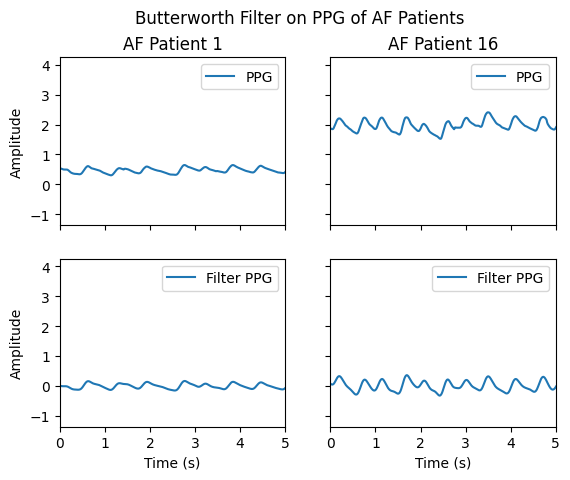

In [4]:
afyPPG1 = my_filter.butter_bandpass(n_001af_d[:,0], 0.5, 5, 125)
afyECG1 = my_filter.butter_bandpass(n_001af_d[:,1],0.05,62,125)
afyPPG16 = my_filter.butter_bandpass(n_016af_d[:,0],0.5,5,125)
afyECG16 = my_filter.butter_bandpass(n_016af_d[:,1],0.05,62,125)


sub_plotting4x4af("Butterworth Filter on PPG of AF Patients",n_001af_t,n_001af_d,afyPPG1,1,n_016af_t,n_016af_d,afyPPG16,16)


Checking for periods of non-af in af wave 

Text(0, 0.5, 'Amplitude')

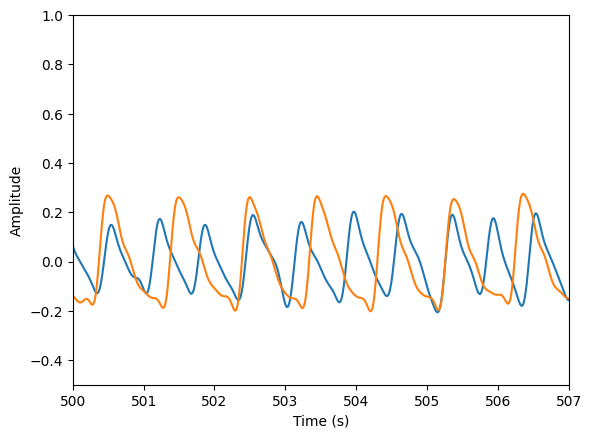

In [5]:
plt.plot(n_001af_t,afyPPG1)
plt.plot(n_001_t,yPPG1)
plt.ylim([-0.5,1])
plt.xlim([500,507])
plt.xlabel("Time (s)")  
plt.ylabel("Amplitude")


Plots all patients (Ignores patients with NaN)

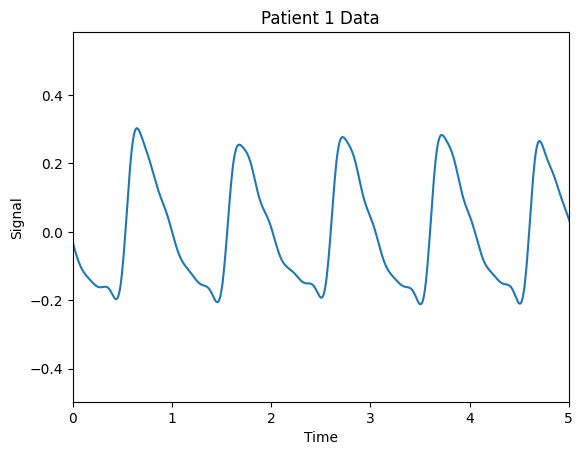

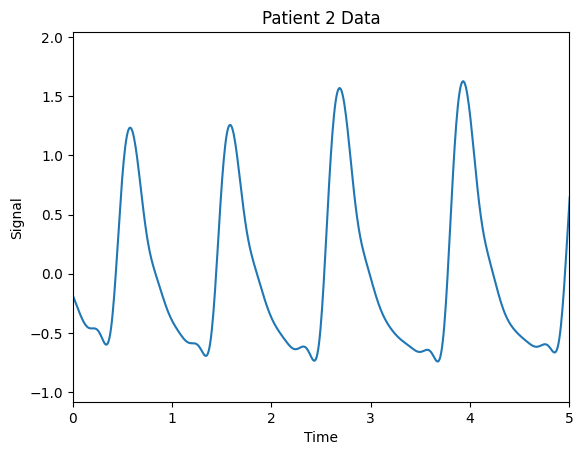

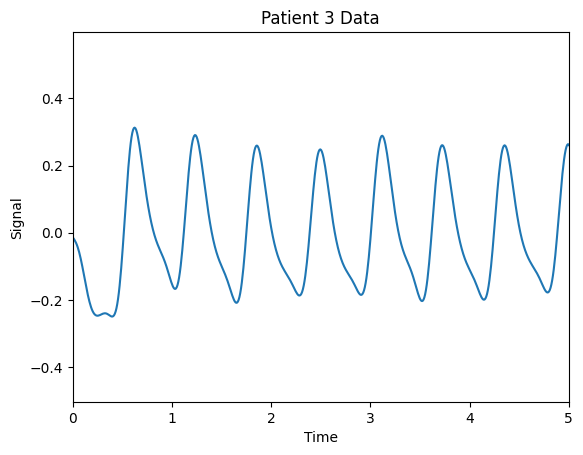

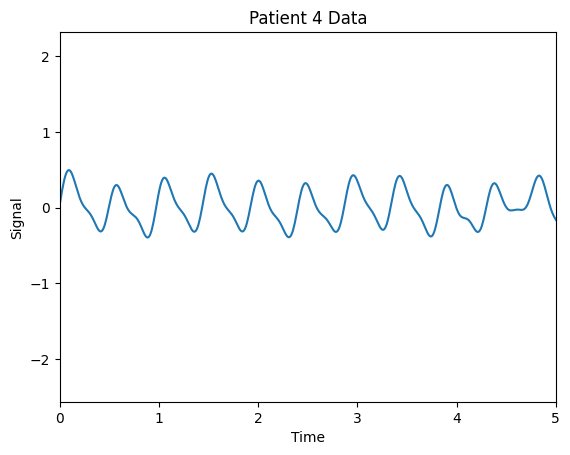

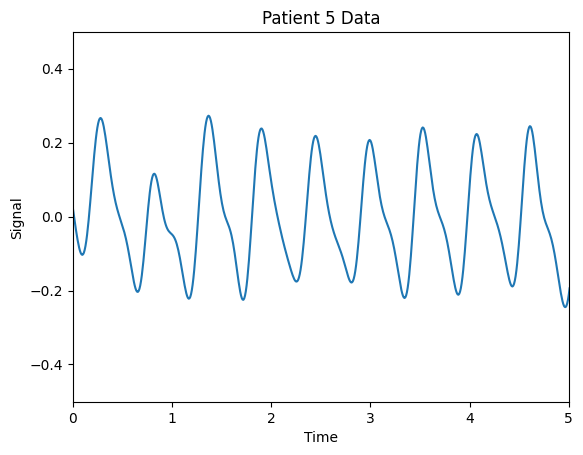

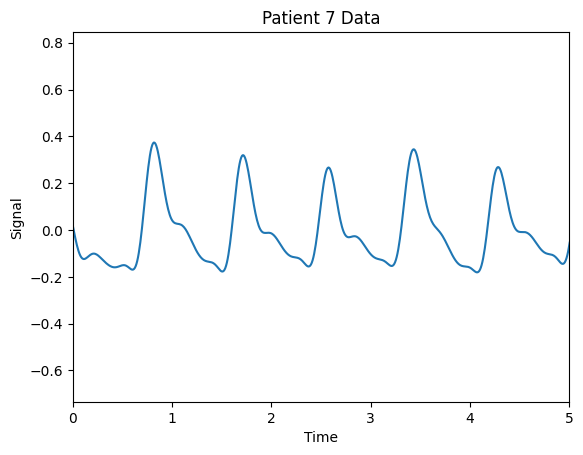

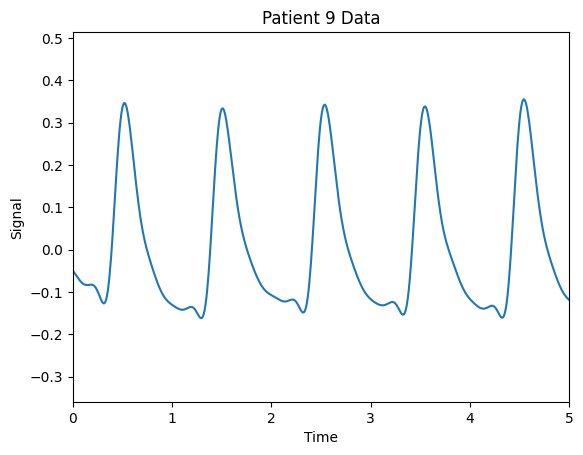

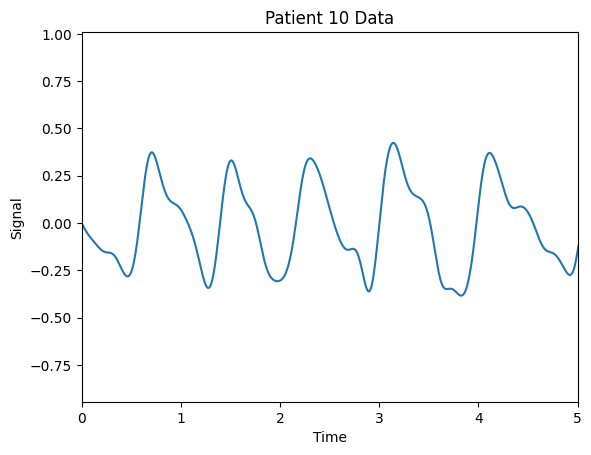

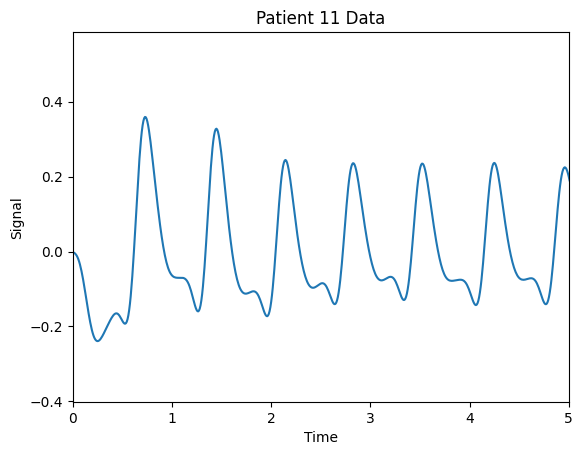

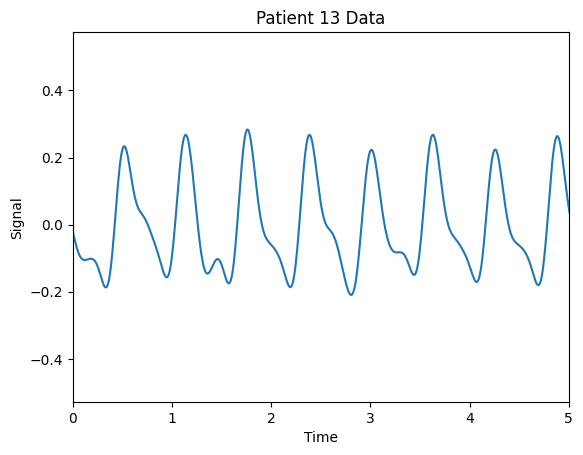

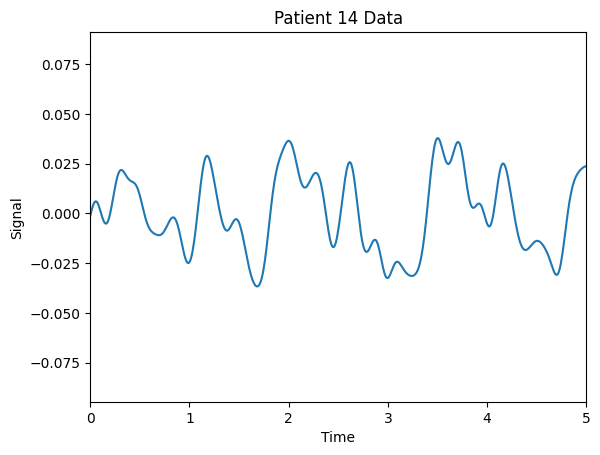

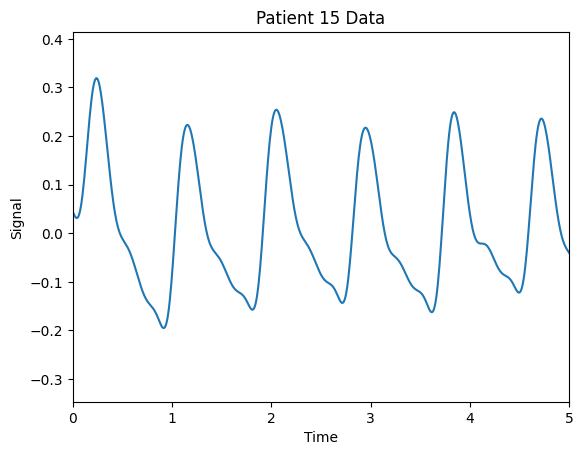

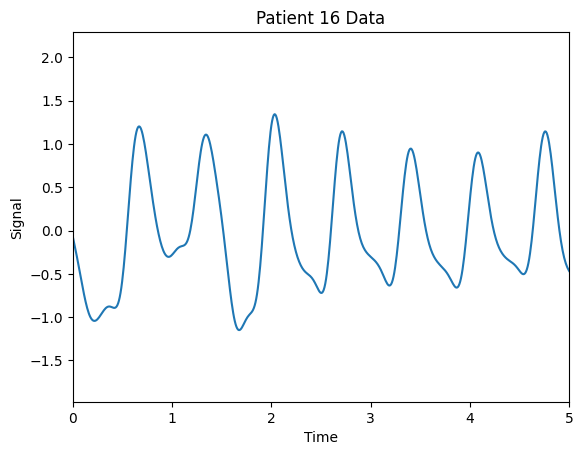

In [6]:
import numpy as np
import csv
from scipy.signal import find_peaks, savgol_filter
import matplotlib.pyplot as plt
import math

data = data_Main



# Initialize lists to store patient-specific RMS values and spike counts
patient_rms_values = []
patient_spike_counts = []

for i in range(len(data)):
    temp = data[i][:, 1]  
    if math.isnan(np.mean(temp)):
        pass
    else:
        temp = my_filter.butter_bandpass(temp, 0.5, 5.0, 125)
        
        # Plot each data on a new graph
        plt.figure()
        plt.plot(n_001_t.squeeze(1)[:len(temp)], temp)
        plt.xlim([0, 5])
        plt.title(f'Patient {i+1} Data')
        plt.xlabel('Time')
        plt.ylabel('Signal')
        plt.show()


Text(0, 0.5, 'Ampltiude')

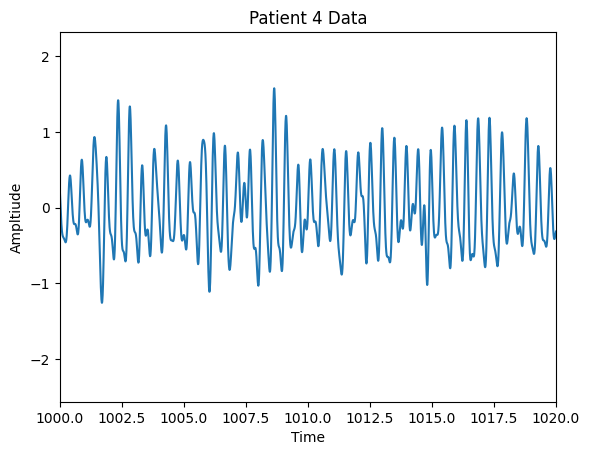

In [7]:
t = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_004_data.csv",usecols= [0])
d = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_004_data.csv",usecols= [1,2,3])



t = t.to_numpy()
d = d.to_numpy()


d_new = my_filter.butter_bandpass(d[:,0], 0.5, 5, 125)
plt.figure()
plt.plot(t,d_new)
plt.xlim([1000,1020])
plt.title('Patient 4 Data')
plt.xlabel('Time')
plt.ylabel('Ampltiude')

Text(0, 0.5, 'Ampltiude')

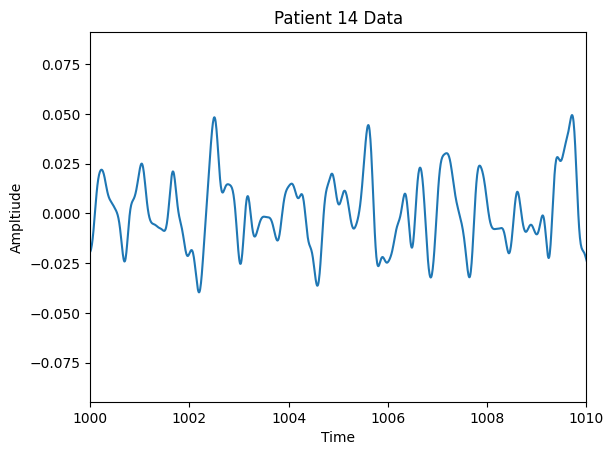

In [8]:
t1 = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_014_data.csv",usecols= [0])
d1 = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_014_data.csv",usecols= [1,2,3])

t1 = t1.to_numpy()
d1 = d1.to_numpy()

d1_new = my_filter.butter_bandpass(d1[:,0], 0.5, 5, 125)
plt.plot(t1,d1_new)
plt.xlim([1000,1010])
plt.title('Patient 14 Data')
plt.xlabel('Time')
plt.ylabel('Ampltiude')

Text(0.5, 1.0, 'Patient 10 Data')

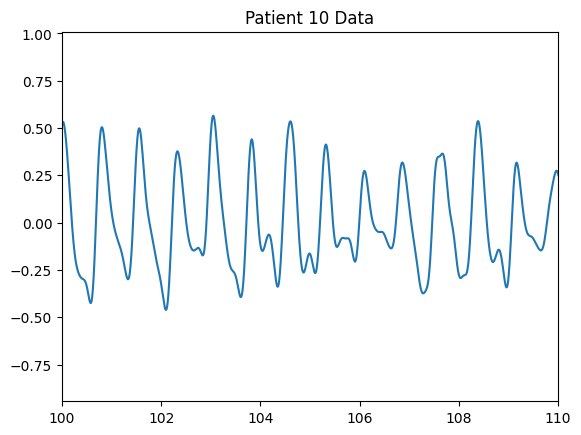

In [9]:
t = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_010_data.csv",usecols= [0])
d = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_010_data.csv",usecols= [1,2,3])



t = t.to_numpy()
d = d.to_numpy()


d_new = my_filter.butter_bandpass(d[:,0], 0.5, 5, 125)
plt.figure()
plt.plot(t,d_new)
plt.xlim([100,110])
plt.title('Patient 10 Data')

Peak amplitudes

In [10]:
from scipy.signal import find_peaks
x = n_001_t
peaks_max = []
all_avg = []
path_af = "C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_af_csv/mimic_perform_af_csv"
path_nonaf = "C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv"
data_Main = Mimic_all_reader(path_nonaf)
data_mainaf = Mimic_all_reader(path_af)

for i in range(len(data_Main)):
    temp = data_Main[i][:, 1]
    if math.isnan(np.mean(temp)) == True:
        pass
    else:
        temp = my_filter.butter_bandpass(temp, 0.5, 5.0, 125)
        temp_1 = savgol_filter(temp, 30, polyorder=2)
        splice_peaks, _ = find_peaks(-temp_1)
        temp = temp[splice_peaks[0]:]
        temp_find = find_peaks(temp)
        for i in range(len(temp_find)-1):
            in_dex = temp_find[i]
            peaks_max.append(temp[in_dex])


for i in range(len(peaks_max)):
    print(np.mean(peaks_max[i]))
    all_avg.append(np.mean(peaks_max[i]))
print("\n" + str(np.mean(all_avg)) + "\n")

peaks_max = []
all_avg = []

for i in range(len(data_mainaf)):
    temp = data_mainaf[i][:, 1]
    if math.isnan(np.mean(temp)) == True:
        pass
    else:
        temp = my_filter.butter_bandpass(temp, 0.5, 5.0, 125)
        temp_find = find_peaks(temp)
        for i in range(len(temp_find)-1):
            in_dex = temp_find[i]
            peaks_max.append(temp[in_dex])



for i in range(len(peaks_max)):
    print(np.mean(peaks_max[i]))
    all_avg.append(np.mean(peaks_max[i]))
print("\n" + str(np.mean(all_avg)))





0.14730522957877823
0.4502444317447673
0.24359529520906623
0.6185864922411155
0.20451219212468885
0.11199397386539892
0.1154281372981713
0.3757965462362552
0.15706084617908916
0.2155078671092498
0.01414765292352451
0.14858804205676351
0.9514332390771698

0.28878461120338755

0.12442433310024521
0.17329248748425516
0.1732817117226837
0.2918621076915005
0.2688598379944442
0.06571140171163958
0.40522254968028476
0.06394263731408813
0.14791707807409918
0.157192963868826
0.24702304497444977
0.7775737171525979
0.27648115238131227
0.11366289809548434
0.08220657368641852
0.058958521964902255

0.21422581355607695


Duration of a peroid

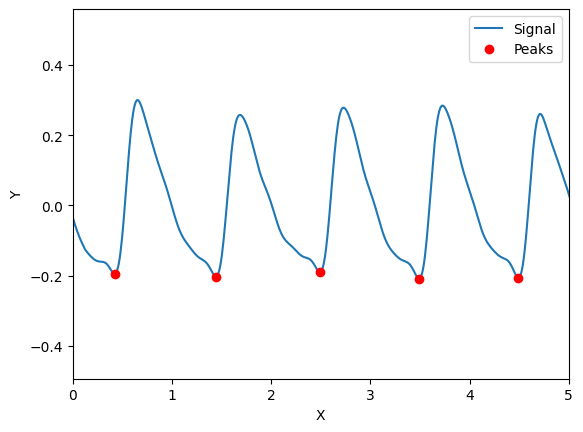

In [11]:
y = yPPG1
x = n_001_t
y = savgol_filter(y, 30, polyorder=2)
peaks,_ = find_peaks(-y)
peak_to_peak_values = y[peaks].max() - y[peaks].min()
#print(peak_to_peak_values)



# Plot the data and highlight peaks
plt.plot(x, y, label='Signal')
plt.plot(x[peaks], y[peaks], 'ro', label='Peaks')
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([0,5])
plt.legend()
plt.show()



Finds the all the peaks and calculates the duration between each peak

In [12]:
# data_Main = Mimic_all_reader(path_nonaf)
# data_mainaf = Mimic_all_reader(path_af)
# from scipy.signal import savgol_filter
# window_length = 30  # Adjust the window length as needed
# all_diff = []
# long_list = []
# with open("eachPEAKTOPEAK.csv", "w", newline="") as csvfile:
#     csvwriter = csv.writer(csvfile)

#     for i in range(len(data_Main)):
#         t = data_Main[i][:,0]
#         temp = data_Main[i][:,1]
#         temp = my_filter.butter_bandpass(temp,0.5,5.0,125)
#         temp = savgol_filter(temp, window_length, polyorder=2)

#         min_peaks,_ = find_peaks(-temp)

#         # Create a list to store the pairs of data
#         data_pairs = [[n_001_t[min_peaks][j], temp[min_peaks][j]] for j in range(len(temp[min_peaks]))]
        
        
#         # Calculate differences between consecutive values
#         differences = [temp[min_peaks][i+1] - temp[min_peaks][i] for i in range(len(temp[min_peaks]) - 1)]

        
#         if len(differences) == 0:
#             pass
#         else :
#             # Compute the average difference
#             average_difference = sum(differences) / len(differences)
#             #print(average_difference)
#             all_diff.append(average_difference)

#         # Write the pairs to the CSV file in new columns
#         for pair in zip(*data_pairs):
#             csvwriter.writerow(pair)

# average_diff = np.mean(all_diff)
# #print(average_diff)


In [13]:
# data_Main = Mimic_all_reader(path_nonaf)
# data_mainaf = Mimic_all_reader(path_af)
# from scipy.signal import savgol_filter
# window_length = 30  
# long_list = []
# with open("PeriodDiff_af.csv", "w", newline="") as csvfile:
#     csvwriter = csv.writer(csvfile)

#     for i in range(len(data_Main)):
#         t = data_mainaf[i][:,0]
#         temp = data_mainaf[i][:,1]
#         temp = my_filter.butter_bandpass(temp,0.5,5.0,125)
#         temp = savgol_filter(temp, window_length, polyorder=2)

#         min_peaks,_ = find_peaks(-temp)

#         # Create a list to store the pairs of data
#         data_pairs = [[n_001_t[min_peaks][j], temp[min_peaks][j]] for j in range(len(temp[min_peaks]))]
        
        
#         # Calculate differences between consecutive values
#         differences = [temp[min_peaks][i+1] - temp[min_peaks][i] for i in range(len(temp[min_peaks]) - 1)]
#         long_list.append(differences)
        
#         if len(differences) == 0:
#             pass
#         else :
#             # Compute the average difference
#             average_difference = sum(differences) / len(differences)
#             #print(average_difference)

#         # Write the pairs to the CSV file in new columns
#         for i in range(len(long_list)):
#             csvwriter.writerow(long_list[i])
#         long_list = []

# #print(average_diff)


Finds the indexes for each peroid 

In [14]:
import numpy as np
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
diff = []


data = yPPG1
temp = savgol_filter(data, 30, polyorder=2)
# Find peaks in the data
peaks, _ = find_peaks(-temp)  

# Initialize RMS values
rms_values = []

# Iterate over peaks to calculate RMS between each peak
for i in range(len(peaks) - 1):
    peak1 = peaks[i]
    peak2 = peaks[i + 1]
    print(peak1,peak2)
    # Calculate RMS between peak1 and peak2
    rms = np.sqrt(np.mean((data[peak1:peak2])) ** 2)
    rms_values.append(rms)
    sub = peak2 - peak1
    diff.append(sub)
print(len(peaks))
print(len(rms_values))
print(np.mean(diff))








53 180
180 311
311 436
436 561
561 680
680 800
800 927
927 1062
1062 1189
1189 1311
1311 1436
1436 1564
1564 1695
1695 1821
1821 1944
1944 2070
2070 2198
2198 2327
2327 2428
2428 2449
2449 2573
2573 2700
2700 2824
2824 2951
2951 3080
3080 3209
3209 3307
3307 3329
3329 3414
3414 3455
3455 3583
3583 3714
3714 3847
3847 3968
3968 4095
4095 4224
4224 4356
4356 4483
4483 4605
4605 4730
4730 4860
4860 4992
4992 5120
5120 5242
5242 5371
5371 5487
5487 5507
5507 5642
5642 5771
5771 5903
5903 6036
6036 6169
6169 6303
6303 6429
6429 6555
6555 6683
6683 6816
6816 6939
6939 7067
7067 7199
7199 7334
7334 7468
7468 7592
7592 7726
7726 7858
7858 7991
7991 8114
8114 8240
8240 8369
8369 8501
8501 8631
8631 8752
8752 8878
8878 9005
9005 9134
9134 9256
9256 9380
9380 9503
9503 9629
9629 9753
9753 9879
9879 9983
9983 10005
10005 10137
10137 10265
10265 10386
10386 10510
10510 10636
10636 10763
10763 10887
10887 11013
11013 11143
11143 11273
11273 11397
11397 11522
11522 11650
11650 11780
11780 11913
11913

Plots a period from the index above

Text(0, 0.5, 'Amplitude')

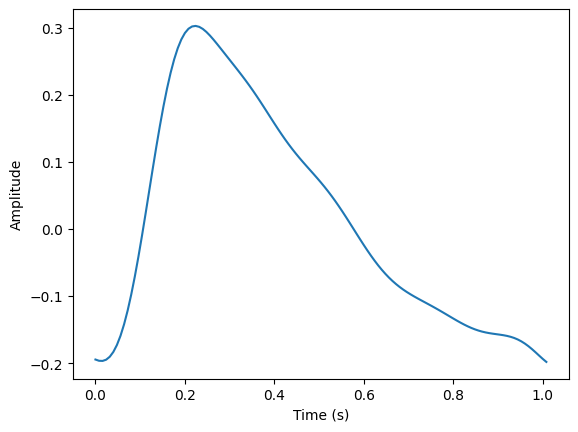

In [15]:
plt.plot(n_001_t.squeeze(1)[:len(yPPG1[53:180])], yPPG1[53:180])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')


Finds the average peak duration for a specific non-af patient and using sliding window using the average peroid duration finds the RMS and number of peaks

In [16]:
import numpy as np
import csv
from scipy.signal import find_peaks, savgol_filter
import matplotlib.pyplot as plt
import math

data_Main = Mimic_all_reader(path_nonaf)
data_mainaf = Mimic_all_reader(path_af)

# Sliding window peak and rms finder
def non_overlapping_sliding_window_rms(signal, window_size):
    rms_values = []
    spike_l = []
    for i in range(0, len(signal), window_size):
        window = signal[i:i + window_size]
        rms = np.sqrt(np.mean(window ** 2))
        N_peak, _ = find_peaks(window)
        spike_l.append(len(N_peak))
        rms_values.append(rms)
    return np.array(rms_values), spike_l

diff_2 = []
tot = []
all = []
patient_rms_values = []
patient_spike_counts = []
mean_find = []
ppg_info = data_Main
# Calculate the average difference between peaks
for i in range(len(ppg_info)):
    temp = ppg_info[i][:, 1]
    if math.isnan(np.mean(temp)):
        continue
    else:
        temp = my_filter.butter_bandpass(temp, 0.5, 5.0, 125)
        temp = savgol_filter(temp, 30, polyorder=2)

        min_peaks, _ = find_peaks(-temp)
        for j in range(len(min_peaks) - 1):
            peak1 = min_peaks[j]
            peak2 = min_peaks[j + 1]
            sub_2 = peak2 - peak1
            diff_2.append(sub_2)
        tot.append(np.mean(diff_2))
        print(str(np.mean(diff_2))+"\n")

# Find the peaks and rms values in window size from average difference of peaks
for i in range(len(ppg_info)):
    temp = ppg_info[i][:, 1]
    if math.isnan(np.mean(temp)):
        continue
    else:
        temp = my_filter.butter_bandpass(temp, 0.5, 5.0, 125)
        temp_1 = savgol_filter(temp, 30, polyorder=2)
        splice_peaks, _ = find_peaks(-temp_1)
        all.append(temp[splice_peaks[0]:])
for i in range(len(tot)):
    rms_values, spike_counts = non_overlapping_sliding_window_rms(all[i], math.ceil(tot[i]))
    patient_rms_values.append(rms_values)
    patient_spike_counts.append(spike_counts)
    mean_find.append(np.mean(rms_values))
    print(np.mean(rms_values))
diff_2 = []
tot = []
print("\n"+str(np.mean(mean_find))+" --> The average number of spikes in a window")


110.08223201174744

90.02431702191534

85.28365566932119

76.58370578470182

75.1467522052927

70.43540557469464

69.49463647199046

70.73879452701108

68.90267565359477

69.14282420217673

67.07059780398536

68.15174817227926

68.85004768801441

0.14384368241079107
0.6454167926557328
0.14690696421314745
0.42002485644981674
0.12778909239845834
0.13449797664437665
0.16287343341086685
0.2843791642472072
0.15017189421994426
0.12944485770262817
0.018382683956381495
0.13242812546111427
0.6174375234531331

0.23950746517104607 --> The average number of spikes in a window


Plots the first 3 windows 

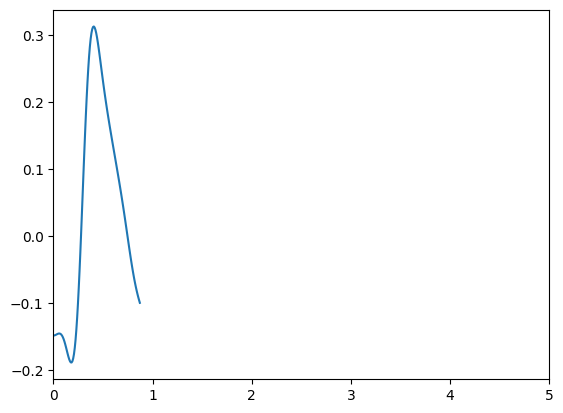

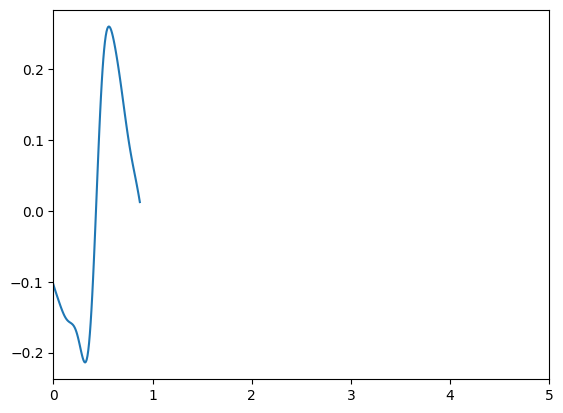

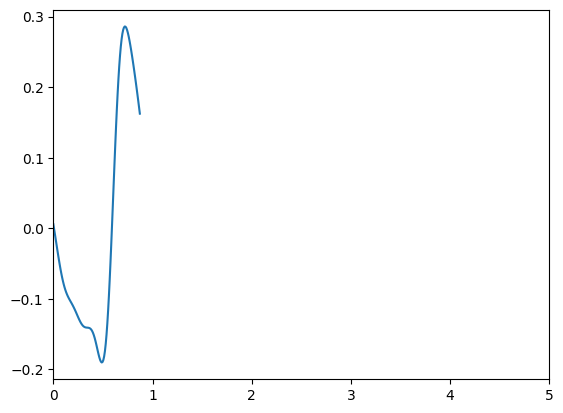

In [17]:
signal = yPPG1  
window_s = 110 # Window size from pervious code depending on the data you are looking at
rms_v = []
door = []
for i in range(0, len(signal), window_s):
    temp = my_filter.butter_bandpass(signal, 0.5, 5.0, 125)
    temp_1 = savgol_filter(temp, 30, polyorder=2)
    splice_peaks, _ = find_peaks(-temp_1)
    temp = temp[splice_peaks[0]:]
    window = temp[i:i + window_s]
    door.append(window)
    N_peak, _ = find_peaks(window)
#print(math.ceil(len(door)/500))
for i in range(math.ceil(len(door)/500)) :
    plt.figure()
    plt.plot(n_001_t.squeeze(1)[:len(door[i])], door[i])
    plt.xlim([0, 5])
    plt.show()


Checking whether the intial wave is being spliced out

150001
149970


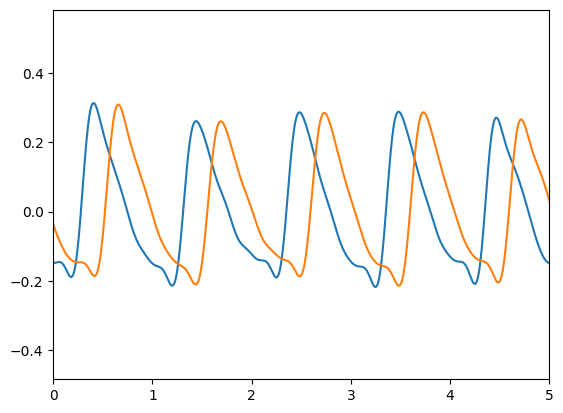

In [18]:
temp = my_filter.butter_bandpass(yPPG1, 0.5, 5.0, 125)
temp_1 = savgol_filter(temp, 30, polyorder=2)
splice_peaks, _ = find_peaks(-temp_1)
temp = temp[splice_peaks[0]:]
plt.plot(n_001_t.squeeze(1)[:len(temp)], temp) # Spliced data
plt.xlim([0, 5])
plt.plot(n_001_t.squeeze(1)[:len(temp_1)], temp_1) # Original data
print(len(yPPG1))
print(len(temp))

Trying to find window size for AF to find number of peaks and RMS

In [19]:
import numpy as np
import csv
from scipy.signal import find_peaks


data = data_mainaf

def non_overlapping_sliding_window_rms(signal, window_size):
    rms_v = []
    spike_l = []
    for i in range(0, len(signal), window_size):
        window = signal[i:i + window_size]
        rms = np.sqrt(np.mean(window ** 2))
        N_peak, _ = find_peaks(window)
        spike_l.append(len(N_peak))
        rms_v.append(rms)
    return rms_v, spike_l

import math

# Initialize lists to store patient-specific RMS values and spike counts
patient_rms_values = []
patient_spike_counts = []

for i in range(len(data)):
    temp = data[i][:, 1]  # Assuming the relevant data is in the second column
    if math.isnan(np.mean(temp)) == True:
        pass
    else:
        temp = my_filter.butter_bandpass(temp, 0.5, 5.0, 125)
        temp_1 = savgol_filter(temp, 30, polyorder=2)
        splice_peaks, _ = find_peaks(-temp_1)
        temp = temp[splice_peaks[0]:]
        rms_values, spike_counts = non_overlapping_sliding_window_rms(temp, 138)
        patient_rms_values.append(rms_values)
        patient_spike_counts.append(spike_counts)
        print(np.mean(spike_counts))
print("\n"+str(np.mean(patient_spike_counts))+" --> The average number of peaks in a window")
# # Write patient data to a CSV file with each patient's RMS and spike counts
# output_file = "RMS_Peaks_nonaf.csv"
# with open(output_file, "w", newline="") as csvfile:
#     csvwriter = csv.writer(csvfile)
#     csvwriter.writerow(["Patient", "RMS", "Peak Count"])  # Header row
#     for i, (rms_row, spike_row) in enumerate(zip(patient_rms_values, patient_spike_counts), start=1):
#         for rms_val, spike_count in zip(rms_row, spike_row):
#             csvwriter.writerow([f"Patient {i}", rms_val, spike_count])



1.7764489420423184
1.5988960441582336
1.7267709291628335
2.611775528978841
2.0570377184912605
2.356945722171113
1.7856485740570378
1.969641214351426
3.1609935602575896
2.238270469181233
1.8702851885924563
1.8077276908923643
2.3495860165593374
2.2713891444342225
2.2879484820607177
3.2879484820607177

2.197332106715731 --> The average number of peaks in a window


FFT 

c:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\shrey\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


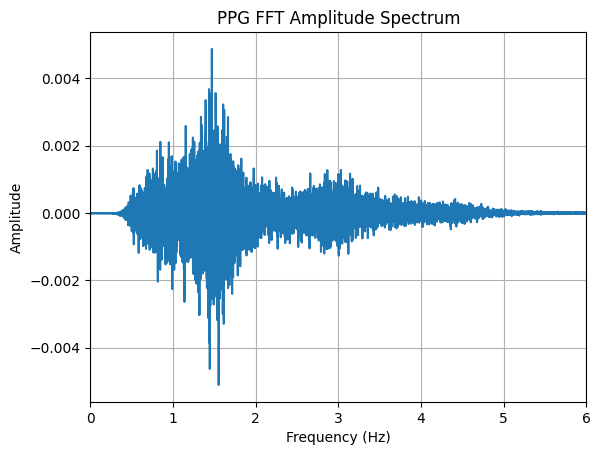

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, ifft


# time_values = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_004_data.csv",usecols= [0])
# d = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_004_data.csv",usecols= [1,2,3])

time_values = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_af_csv/mimic_perform_af_csv/mimic_perform_af_001_data.csv",usecols=[0])
d = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_af_csv/mimic_perform_af_csv/mimic_perform_af_001_data.csv",usecols=[1,2,3])



# Convert non-af Pandas structure to numpy
time_values = time_values.to_numpy()
d = d.to_numpy()

y = my_filter.butter_bandpass(d[:,0],0.5,5,125) # PPG signal
fft_result = np.fft.ifft(y)
sampling_frequency = 125  # given in Hz
n = len(time_values)
frequency_bins = np.fft.fftfreq(n, d=1/sampling_frequency)


# Compute the FFT
plt.plot(frequency_bins, fft_result)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title("PPG FFT Amplitude Spectrum")
plt.xlim([0, 6])
plt.grid()
plt.show()


Symmetry seen from fft

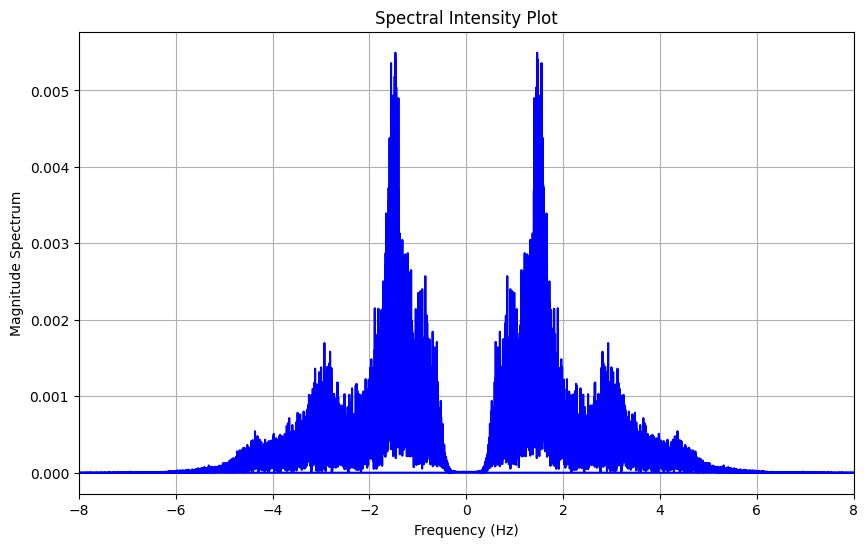

In [21]:
import numpy as np
import matplotlib.pyplot as plt


# Compute the FFT
fft_result = np.fft.ifft(y)
magnitude_spectrum = np.abs(fft_result)  # Magnitude spectrum

# Frequency bins
sampling_frequency = 125  # given in Hz
n = len(time_values)
frequency_bins = np.fft.fftfreq(n, d=1/sampling_frequency)

# Plot the spectral intensity
plt.figure(figsize=(10, 6))
plt.plot(frequency_bins, magnitude_spectrum, color='b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude Spectrum')
plt.title('Spectral Intensity Plot')
plt.xlim([-8,8])
plt.grid(True)
plt.show()


Understanding the impact of filtering upon the mean, std and rms

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy.fft import fft
from scipy.signal import butter,lfilter
import random
from Filters import *
from Reader import *
from Mathy import *
from Plotter import *


path_nonaf = "C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv"

path_af = "C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_af_csv/mimic_perform_af_csv"


data_Main = Mimic_all_reader(path_nonaf)

# Patient 1 non-AF
data = data_Main[0][:,1]

mean_non = mean_PPG(data)
std_non = std_PPG(data)
rms_non = rms_PPG(data)

print("Following is for raw data non-AF Patient 1:\n")
print("Mean: " + str(mean_non) + "  Standard Deviation: "+str(std_non) + "  RMS: "+str(rms_non)+ "\n")

nonafPPG = my_filter.butter_bandpass(data,0.5,5.0,125)

filt_mean_non = mean_PPG(nonafPPG)
filt_std_non = std_PPG(nonafPPG)
filt_rms_non = rms_PPG(nonafPPG)

print("Following is for filtered data non-AF Patient 1:\n")

print("Mean: " + str(filt_mean_non) + "  Standard Deviation: "+str(filt_std_non) + "  RMS: "+str(filt_rms_non)+ "\n")


print("/////////////////////////////////////////////////////////////////////////////////////////////////////")

data_Mainaf = Mimic_all_reader(path_af)

# Patient 1 AF
dataaf = data_Mainaf[0][:,1]

mean_af = mean_PPG(dataaf)
std_af = std_PPG(dataaf)
rms_af = rms_PPG(dataaf)

print("Following is for raw data AF Patient 1:\n")
print("Mean: " + str(mean_af) + "  Standard Deviation: "+str(std_af) + "  RMS: "+str(rms_af)+ "\n")

afPPG = my_filter.butter_bandpass(dataaf,0.5,5.0,125)

filt_mean_af = mean_PPG(afPPG)
filt_std_af = std_PPG(afPPG)
filt_rms_af = rms_PPG(afPPG)

print("Following is for filtered data AF Patient 1:\n")

print("Mean: " + str(filt_mean_af) + "  Standard Deviation: "+str(filt_std_af) + "  RMS: "+str(filt_rms_af)+ "\n")







Following is for raw data non-AF Patient 1:

Mean: 0.4571510025058613  Standard Deviation: 0.15762420484814865  RMS: 0.4835622287215217

Following is for filtered data non-AF Patient 1:

Mean: -2.2419479197186126e-05  Standard Deviation: 0.14610282039624845  RMS: 0.1461028221163831

/////////////////////////////////////////////////////////////////////////////////////////////////////
Following is for raw data AF Patient 1:

Mean: 0.4877308051572912  Standard Deviation: 0.09738793917153193  RMS: 0.4973587729149427

Following is for filtered data AF Patient 1:

Mean: -1.0851684835418161e-05  Standard Deviation: 0.08769998827540486  RMS: 0.0876999889467793



Differential for nonaf patient 001

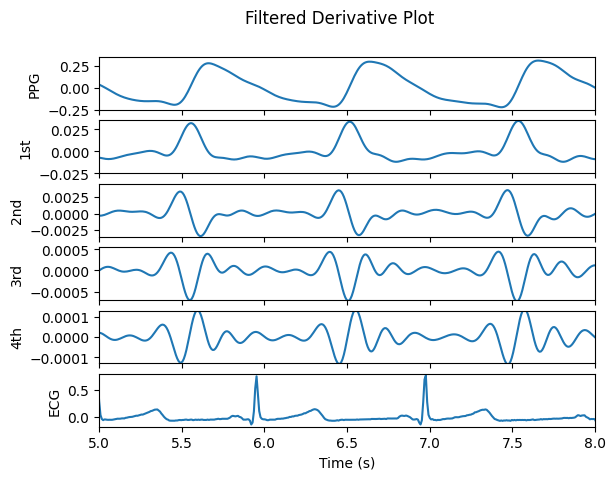

In [23]:
#first_order = derivative(data,1)
first_orderfilt = derivative(nonafPPG,1)
#second_order = derivative(data,2)
second_orderfilt = derivative(nonafPPG,2)
#third_order = derivative(data,3)
third_orderfilt = derivative(nonafPPG,3)
#fourth_order = derivative(data,4)
fourth_orderfilt = derivative(nonafPPG,4)

time = data_Main[0][:,0]
ppg_data = data_Main[0][:,1]
ECG_data = data_Main[0][:,2]
ppg_data = my_filter.butter_bandpass(ppg_data,0.5,5,125)
ECG_data = my_filter.butter_bandpass(ECG_data,0.5,62,125)

diff_plotter_2_0(time,ppg_data,ECG_data,first_orderfilt,second_orderfilt,third_orderfilt,fourth_orderfilt)


Differential for af

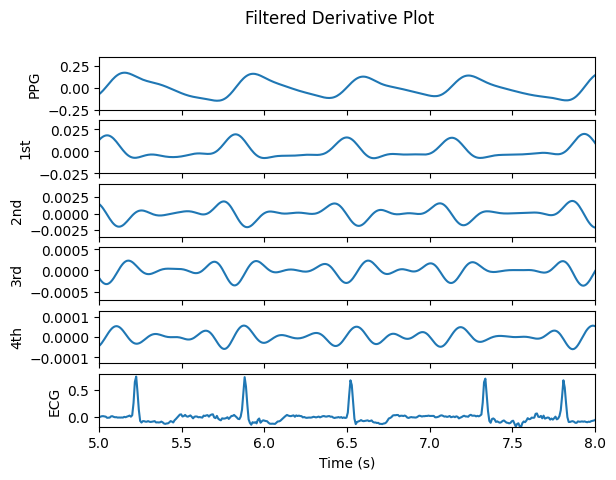

In [24]:
#first_order = derivative(data,1)
first_orderfiltaf = derivative(afPPG,1)
#second_order = derivative(data,2)
second_orderfiltaf = derivative(afPPG,2)
#third_order = derivative(data,3)
third_orderfiltaf = derivative(afPPG,3)
#fourth_order = derivative(data,4)
fourth_orderfiltaf = derivative(afPPG,4)

timeaf = data_Mainaf[0][:,0]
ppg_dataaf = data_Mainaf[0][:,1]
ECG_dataaf = data_Mainaf[0][:,2]
ppg_dataaf = my_filter.butter_bandpass(ppg_dataaf,0.5,5,125)
ECG_dataaf = my_filter.butter_bandpass(ECG_dataaf,0.5,62,125)

diff_plotter_2_0(timeaf,ppg_dataaf,ECG_dataaf,first_orderfiltaf,second_orderfiltaf,third_orderfiltaf,fourth_orderfiltaf)

Mean of mean,std and rms of std

In [25]:
#nonafmean,nonafstd = Mean_std_reader(path_nonaf,1)
#meanaf,stdaf = Mean_std_reader(path_af,1)

filtnonafmean,filtnonafstd,filtnonafrms = Mean_std_reader(path_nonaf,1)
filtafmean,filtafstd, filtafrms = Mean_std_reader(path_af,1)




# df = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_af_csv/mimic_perform_af_csv/mimic_perform_af_019_data.csv",usecols=[1])

# array = df.to_numpy()

# array = my_filter.butter_bandpass(array,0.5,5,125)
# peaks,_ = find_peaks(array.flatten())
# vlaue = np.ptp(array[peaks])
# max = array[peaks].max()
# min = array[peaks].min()
# with open("eachPEAKTOPEAK.csv", "w", newline="") as csvfile:
#          csvwriter = csv.writer(csvfile)
#          csvwriter.writerow([vlaue,max,min])

# with open("AF_Mimicb.csv", "w", newline="") as csvfile:
#         csvwriter = csv.writer(csvfile)
#         for i in range(len(filtafmean)):
#             csvwriter.writerow([filtafmean[i],filtafstd[i],filtafrms[i]])


# filtnonafmean = [x for x in filtnonafmean if x == x]
# filtnonafstd = [x for x in filtnonafstd if x == x]

# filtafmean = [x for x in filtafmean if x == x]
# filtafstd = [x for x in filtafstd if x == x]



# print("Non-AF Raw Mean: " + str(nonafmean) + " Non-AF Filtered Mean: " + str(filtnonafmean)+"\n")

# print("AF Raw Mean: " + str(meanaf) + " AF Filtered Mean: " + str(filtafmean)+"\n")

# print("Non-AF STD: " +str(filtnonafstd) + " AF STD: " + str(filtafstd))

Find and write mean,std,rms,peaktopeak,maxpeak and minpeak the values to csv

In [26]:
# import glob
# import pandas as pd
# from scipy.signal import find_peaks

# # Specify the folder path containing CSV files
# folder_path = path_af

# # Get a list of all CSV files in the folder
# csv_files = glob.glob(f"{folder_path}/*.csv")

# # Initialize lists to store results
# peak_to_peak_values = []
# max_peak_values = []
# min_peak_values = []

# # Process each CSV file
# for csv_file in csv_files:
#     # Read the CSV file
#     df = pd.read_csv(csv_file)

#     # Extract the second column (assuming it's at index 1)
#     second_column = df.iloc[:, 1]

#     # Find peaks
#     peaks, _ = find_peaks(second_column)

#     # Calculate peak-to-peak, max, and min values
#     peak_to_peak = np.ptp(second_column[peaks])
#     max_peak = second_column[peaks].max()
#     min_peak = second_column[peaks].min()

#     # Append results to lists
#     peak_to_peak_values.append(peak_to_peak)
#     max_peak_values.append(max_peak)
#     min_peak_values.append(min_peak)

# # Print results for each file
# for i, csv_file in enumerate(csv_files):
#     print(f"File: {csv_file}")
#     print(f"Peak-to-Peak Value: {peak_to_peak_values[i]}")
#     print(f"Maximum Peak Value: {max_peak_values[i]}")
#     print(f"Minimum Peak Value: {min_peak_values[i]}")
#     print("-" * 40)


# with open("RAWAF_Mimicb.csv", "w", newline="") as csvfile:
#         csvwriter = csv.writer(csvfile)
#         for i in range(len(filtnonafmean)):
#             csvwriter.writerow([filtnonafmean[i],filtnonafstd[i],filtnonafrms[i],
#                                 peak_to_peak_values[i],max_peak_values[i],min_peak_values[i]
#                                 ])

Fall and Rise Calculation

In [119]:
t = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_001_data.csv",usecols= [0])
d = pd.read_csv("C:/Shreyas/YourCue/Data/MIMIC_DATA/mimic_perform_non_af_csv/mimic_perform_non_af_csv/mimic_perform_non_af_001_data.csv",usecols= [1,2,3])

t = t.to_numpy()
d = d.to_numpy()

rise_time = []
fall_time = []

rise_data = []
fall_data = []

rise_diff_1 = []
fall_diff_1 = []

allrise_diff_1 = []
allfall_diff_1 = []

d_new = my_filter.butter_bandpass(d[:,0], 0.5, 5, 125)
d_new1 = savgol_filter(d_new, 30, polyorder=2)  
max_peaks, _ = find_peaks(d_new1)
min_peaks, _ = find_peaks(-d_new1)

for i in range(len(min_peaks)-1):
        d_new2 = list(d_new)
        rise_time.append(t[max_peaks[i]] - t[min_peaks[i]])
        rise_data.append( d_new[max_peaks[i]]-d_new[min_peaks[i]])
        rise_diff_1.append(d_new[d_new2.index(d_new[min_peaks[i]]):d_new2.index(d_new[max_peaks[i]])])   
        fall_time.append(t[min_peaks[i + 1]] - t[max_peaks[i]])
        fall_data.append(d_new[min_peaks[i + 1]]- d_new[max_peaks[i]])
        fall_diff_1.append(d_new[d_new2.index(d_new[min_peaks[i+1]]):d_new2.index(d_new[max_peaks[i]])])

print("Rise Time: " + str(np.mean(rise_time)))
print("Fall Time: " + str(np.mean(fall_time))+ "\n")

print("Rise Data: " + str(np.mean(rise_data)))
print("Fall Data: " + str(np.mean(fall_data))+ "\n")

for i in range(len(rise_diff_1)):
        allrise_diff_1.append(derivative(rise_diff_1[i],1))

for i in range(len(fall_diff_1)):
        allfall_diff_1.append(derivative(fall_diff_1[i],1))

# with open("RiseandFall.csv", "w", newline="") as csvfile:
#         csvwriter = csv.writer(csvfile)
#         for i in range(len(rise_diff_1)):
#             csvwriter.writerow([rise_diff_1[i],fall_diff_1[i]])

# print(np.mean(allrise_diff_1))
# print(np.mean(allfall_diff_1))  

Rise Time: 0.21867841409691813
Fall Time: 0.6619794419970615

Rise Data: 0.3891393034397666
Fall Data: -0.3890341626033698

